# ART1 demo

Adaptive Resonance Theory Neural Networks
by Aman Ahuja | github.com/amanahuja | twitter: @amanqa


## Overview

Reminders: 

 * ART1 accepts binary inputs only. 

In this example:
 * We'll use small PNG images for character recognition

# [Load data]

 * Data is a series of png images
 * pixelated drawings of letters

In [34]:
import os
import numpy as np
from PIL import Image
import scipy.io
import pandas as pd
from sklearn import preprocessing

In [2]:
# make sure we're in the root directory

pwd = os.getcwd()
if pwd.endswith('ipynb'):
    os.chdir('..')
    
#print os.getcwd()

In [3]:
# data directory
data_dir = 'data/lettericons'

data_list = []


for f in os.listdir(data_dir):
    data_list.append(os.path.join(data_dir, f))

# Just print first five images
data_list[:5]

['data/lettericons/C09.png',
 'data/lettericons/C08.png',
 'data/lettericons/A08.png',
 'data/lettericons/A09.png',
 'data/lettericons/B09.png']

#### Reformat data

In [4]:
from utils import preprocess_data

In [5]:
raw_data = []

for ii in data_list: 
    im = Image.open(ii)
    idat = np.array(im) > 100
    idat = idat.flatten()
    raw_data.append(idat)
    
np.random.seed(111)
np.random.shuffle(raw_data)
    
data = preprocess_data(raw_data)

In [6]:
data

array([[0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 1]])

In [36]:
# load
mat250 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz0250Hz.mat')
mat500 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz0500Hz.mat')
mat1000 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz1000Hz.mat')
mat2000 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz2000Hz.mat')
mat4000 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz4000Hz.mat')
mat7000 = scipy.io.loadmat('/Users/xtinaushakova/Play/ushi/data/spectra/ANprob41HSR_44kHz7000Hz.mat')
# convert to dataframe
mat250 = pd.DataFrame(mat250['ANprobRateOutput'])
mat500 = pd.DataFrame(mat500['ANprobRateOutput'])
mat1000 = pd.DataFrame(mat1000['ANprobRateOutput'])
mat2000 = pd.DataFrame(mat2000['ANprobRateOutput'])
mat4000 = pd.DataFrame(mat4000['ANprobRateOutput'])
mat7000 = pd.DataFrame(mat7000['ANprobRateOutput'])
# normalize and round to get binary data
min_max_scaler = preprocessing.MinMaxScaler()

mat250_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat250)).transpose())
mat500_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat500)).transpose())
mat1000_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat1000)).transpose())
mat2000_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat2000)).transpose())
mat4000_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat4000)).transpose())
mat7000_scaled = round(pd.DataFrame(min_max_scaler.fit_transform(mat7000)).transpose())
# concatenate into one long shabang
cat = pd.concat([mat250_scaled, mat500_scaled, mat1000_scaled, mat2000_scaled, mat4000_scaled, mat7000_scaled])
# preprocess data
cat = cat.astype(int).values

#### Visualize the input data

In [7]:
# Examine one

im = Image.open(data_list[0])
im


In [8]:
data.shape

(34, 100)

In [9]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [10]:
from utils import display_single_png, display_all_png

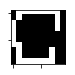

In [11]:
display_single_png(idat)

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

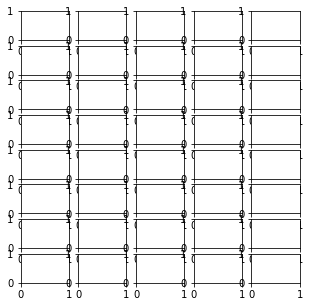

In [12]:
display_all_png(data)

plt.show()

## DO

In [13]:
from ART1 import ART1

In [44]:
from collections import defaultdict

# create networkreload

input_row_size = 100
max_categories = 8
rho = 0.4


network = ART1(n=input_row_size, m=max_categories, rho=rho)

# preprocess data
data_cleaned = preprocess_data(data)

# shuffle data? 
np.random.seed(155)
np.random.shuffle(data_cleaned)

# multiple epochs?
network.compute(cat)


# # learn data array, row by row
# for row in data_cleaned:
#     network.learn(row)

print()
print("n rows of data:         ", len(data_cleaned))
print("max categories allowed: ", max_categories)
print("rho:                    ", rho)

#print "n categories used:      ", network.n_cats
print()


AssertionError: size check

In [38]:
data_cleaned

array([[0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0]])

In [39]:
network.Y

array([1.71428571, 1.15789474, 1.94594595, 1.52380952, 1.28      ,
       1.5       , 1.30612245, 1.76470588])

### Visualize cluster weights as an input pattern

The cluster unit weights can be represented visually, representing the learned patterns for that unit. 

Cluster Unit #0


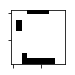

Cluster Unit #1


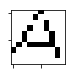

Cluster Unit #2


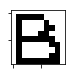

Cluster Unit #3


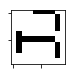

Cluster Unit #4


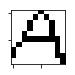

Cluster Unit #5


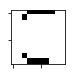

Cluster Unit #6


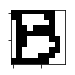

Cluster Unit #7


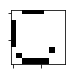

In [40]:
# print learned clusters
for idx, cluster in enumerate(network.Bij.T): 
    print("Cluster Unit #{}".format(idx))
    display_single_png(cluster)

### Sanity check: predict cluster centers

What if we take one of these cluster "centers" and feed it back into the network for prediction?

Target:  2


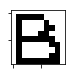

prediction (cluster index):  2


In [41]:
# Cluster_index
clust_idx = 2
print("Target: ", clust_idx)
idata = network.Bij.T[clust_idx]
idata = idata.astype(bool).astype(int)
display_single_png(idata)

# Prediction
pred = network.predict(idata)
print("prediction (cluster index): ", pred)

### Examine the predictions visually

In [43]:
# output results, row by row
output_dict = defaultdict(list)

for row, row_cleaned in zip (data, data_cleaned): 
    pred = network.predict(row_cleaned)
    output_dict[pred].append(row)

for k,v in output_dict.iteritems():
    print("Cluster #{} ({} members)".format(k, len(v)))
    print('-'*20)
    for row in v: 
        display_single_output(row)
        
#   \  print "'{}':{}".format(
#         row, 
#         network.predict(row_cleaned))
    

AttributeError: 'collections.defaultdict' object has no attribute 'iteritems'

### Sanity check: Modify input pattern randomly


By making random variations of the input pattern, we can judge the ability of the network to generalize input patterns not seen in the training data. 

Target:  3


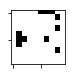

prediction (cluster index):  3


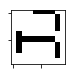

--------------------
Target:  6


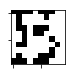

prediction (cluster index):  6


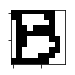

--------------------
Target:  1


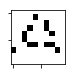

prediction (cluster index):  1


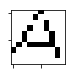

--------------------
Target:  5


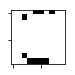

prediction (cluster index):  5


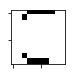

--------------------
Target:  2


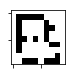

prediction (cluster index):  2


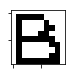

--------------------
Target:  2


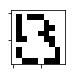

prediction (cluster index):  2


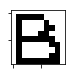

--------------------
Target:  6


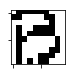

prediction (cluster index):  6


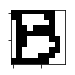

--------------------
Target:  2


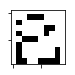

prediction (cluster index):  2


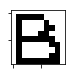

--------------------
Target:  1


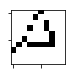

prediction (cluster index):  1


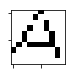

--------------------
Target:  4


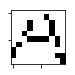

prediction (cluster index):  4


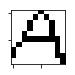

--------------------


In [29]:
# of tests
ntests = 10

# number of bits in the pattern to modify
nchanges = 30

for test in range(ntests):

    #cluster_index
    clust_idx = np.random.randint(network.output_size)
    print("Target: ", clust_idx)
    idata = network.Bij.T[clust_idx]
    idata = idata.astype(bool).astype(int)

    #modify data
    for ii in range(nchanges):
        rand_element = np.random.randint(idata.shape[0])

        # flip this bit
        if idata[rand_element] == 0: 
            idata[rand_element] = 1
        else: 
            idata[rand_element] = 0
            
        # randomize this bit
        idata[rand_element] = np.random.randint(1)


    display_single_png(idata)

    # prediction
    pred = network.predict(idata)
    print("prediction (cluster index): ", pred)

    display_single_png(network.Bij.T[pred])
    print("-" * 20)

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

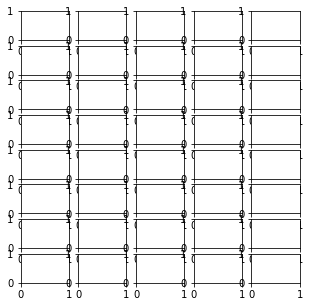

In [31]:
# print training data 
display_all_png(data)
plt.show()